In [1]:
import cv2
import os

STRUCTURES = [
    'struct1', 
    'struct4', 
    'struct5',
    'struct8',
    'struct13',
    'struct16',
    'struct19',
    'struct20',
    'struct22',
]

PATHS = [r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct4",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct5",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct8",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct13",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct16",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct19",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct20",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct22"
]

def resize_all_images(path, new_size=(400, 300)):
    try:
        os.mkdir(os.path.join(path, 'sd'))
    except OSError:
        print("OS error")
    
    for image in os.listdir(path):
        if image.endswith('.png'):
            full_name = os.path.join(path, image)
            im = cv2.imread(full_name)
            resized_im = cv2.resize(im, new_size)
            output_path = os.path.join(path, 'sd', image)
            print('Writing out to', output_path)
            cv2.imwrite(output_path, resized_im)

for path in PATHS:
    resize_all_images(path)


OS error
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_01.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_02.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_03.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_04.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_05.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_06.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd\struct1_07.png
Writing out to C:\Users\rsurs\OneDrive\

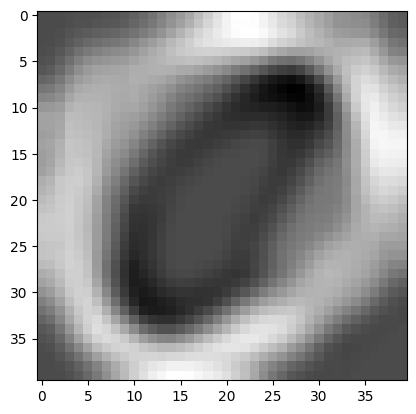

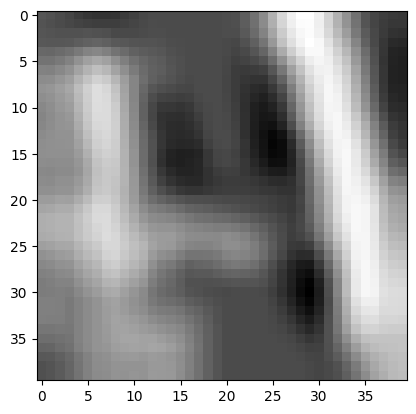

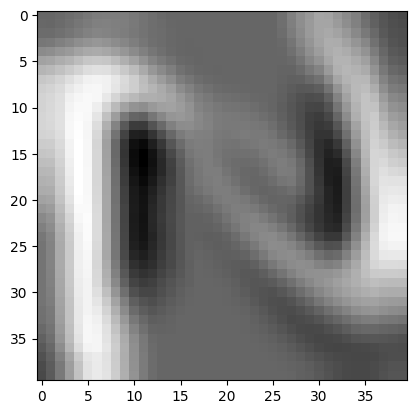

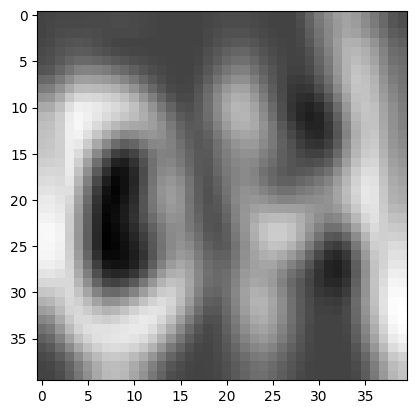

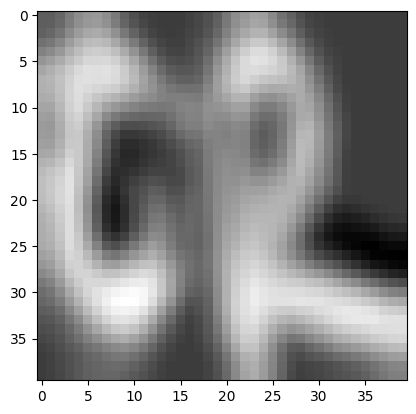

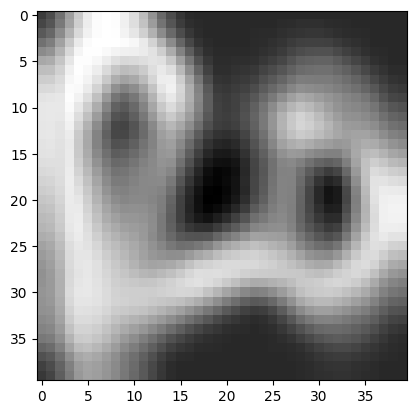

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

LINE_WIDTH = 18

PATHS = [r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct4\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct5\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct8\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct13\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct16\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct19\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct20\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct22\sd"
]


TEMPLATES = [
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\oh\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\or\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\ro\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\h\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\n\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\o\combined.png\\'
]
TEMPLATE_NAMES = ['OH', 'OR', 'O', 'H', 'N', 'RO']

SINGLE_TEMPLATE_PATHS = [
r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\o\\',
r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\h\\',
r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\n',
]

STRUCTURES = [
    'struct1', 
    'struct4', 
    'struct5',
    'struct8',
    'struct13',
    'struct16',
    'struct19',
    'struct20',
    'struct22'
]

SINGLE_TEMPLATE_NAMES = ['O', 'H', 'N']

TRAIN_IMAGES = ['01.png', '09.png', '17.png', '25.png', '33.png']
PYRAMID_SIZES = range(20, 70, 10)
STEP = 5

def get_max_size(x_list, y_list):
    s = max([max(x_list), max(y_list)])
    return (s, s)


def deskew(img, SZ):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11'] / m['mu02']
    M = np.float32([[1, skew, -0.5 * SZ * skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ))
    return img

def crop_and_resize_image(thresh_im, size_before_pad, pad):
    height, width = thresh_im.shape
    top_crop = 0
    bottom_crop = 0
    left_crop = 0
    right_crop = 0
    

    for y in range(height):
        row = thresh_im[y, :]
        if np.count_nonzero(row) > 0:
            top_crop = y
            break
    

    for y in reversed(range(height)):
        row = thresh_im[y, :]
        if np.count_nonzero(row) > 0:
            bottom_crop = y
            break
    

    for x in range(width):
        col = thresh_im[:, x]
        if np.count_nonzero(col) > 0:
            left_crop = x
            break
    

    for x in reversed(range(width)):
        col = thresh_im[:, x]
        if np.count_nonzero(col) > 0:
            right_crop = x
            break
    
    fully_cropped = thresh_im[top_crop:bottom_crop, left_crop:right_crop]
    fully_cropped = cv2.resize(fully_cropped, (size_before_pad, size_before_pad))
    fully_cropped = cv2.copyMakeBorder(fully_cropped, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)
    return fully_cropped

def crop_and_make_templates(path):
    ims = []
    for i, image in enumerate(os.listdir(path)):
        if image.endswith('.png'):
            full_name = os.path.join(path, image)
            im = cv2.imread(full_name, 0)
            ret, im = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY_INV)
            im = crop_and_resize_image(im, 40, 0)
            ims.append(im)
    return ims

def stack_templates(path, train_split=0.9):
    if not os.path.exists(path):
        print(f"Error: The directory '{path}' does not exist.")
        return

    ims = crop_and_make_templates(path)
    n_images = float(len(ims))
    
    ims = [cv2.GaussianBlur(im, (5, 5), 5) / n_images for im in ims]
    
    final_image = ims[0]
    for im in ims[1:]:
        final_image = cv2.add(final_image, im)
    
    plt.imshow(final_image, cmap='gray')
    plt.show()


# Create and stack templates for 'train/r/', 'train/o/', 'train/h/', and 'train/n/'
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\o')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\h')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\n')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\oh')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\or')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\ro')

In [4]:
#Intersect Function
def ccw(A,B,C):
	return (C[0]-A[0])*(B[1]-A[1]) > (B[0]-A[0])*(C[1]-A[1])

def intersects(A,B,C,D):
	return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

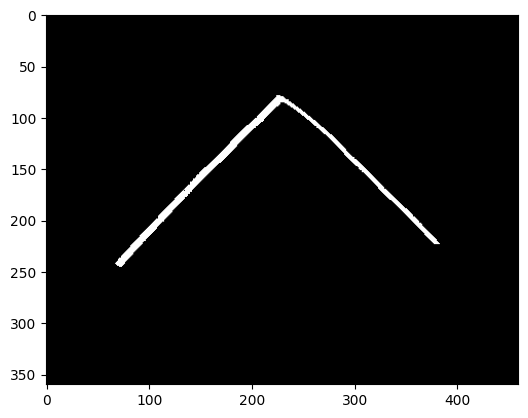

(1.0, 0.0, 0.0, 1.0)

In [5]:
# Start of Main Body
# Bond Detection

import cv2
from collections import defaultdict
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import os
from PIL import Image
import pickle
import random
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import subprocess
import time

BORDER = 30
LINE_WIDTH = 18
BORDER = 30
THRESH_VAL = 100
PATHS = [r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct4",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct5",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct8",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct13",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct16",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct19",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct20",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct22"]


TEMPLATES = [
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\oh\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\or\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\ro\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\h\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\n\combined.png\\',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\o\combined.png\\'
]
TEMPLATE_NAMES = ['OH', 'OR', 'O', 'H', 'N', 'RO']

BOND_PATHS = [
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\single\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\double\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\triple\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\dashed\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\train\wedge\\"
]

BOND_NAMES = ['single', 'double', 'triple', 'dashed', 'wedge']

COLOR_DICT = {
  'single':[255,0,0], #blue
  'double':[0,0,255], #red
  'triple':[0,255,0], #green
  'dashed':[255,165,0], 
  'wedge':[128,0,128],
  'none':[0,0,0]
}
COLOR_DICT_OCR = {
  'OH':[255,0,0],
  'OR':[0,255,0],
  'O':[0,0,255],
  'H':[255,255,0],
  'N':[0,255,255],
  'RO':[255,0,255]
}

BOND_TRAINING_DICT = defaultdict(list)
for i, path in enumerate(BOND_PATHS):
    for image in os.listdir(path):
        if image.endswith('.png'):  
            full_path = os.path.join(path, image)  
            BOND_TRAINING_DICT[BOND_NAMES[i]].append(full_path)
#print(f"Paths of training images\n {BOND_TRAINING_DICT}")

GROUND_TRUTH_DICT = {}
f = open('ocr_groundtruth.txt')
for line in f.readlines():
    split_line = line.split()
    k = split_line[0]
    vals = split_line[1:]
    vals = [int(v) for v in vals]
    GROUND_TRUTH_DICT[k] = vals
f.close()

#print(f"{GROUND_TRUTH_DICT}")

CORNER_TRUTH_DICT = {}
g = open('corners_groundtruth.txt')
for line in g.readlines():
    split_line = line.split()
    k = split_line[0]
    v = split_line[1]
    CORNER_TRUTH_DICT[k] = int(v)
g.close()

#print(f"{CORNER_TRUTH_DICT}")

def inside_box(center_x,center_y,box):
    return (center_x < box[1] and center_x > box[0] and center_y < box[3] and center_y > box[2])

def template_match(template, img, min_scale=0.3, max_scale=1.0, n_scales=15, threshold=0.6):
    im = cv2.imread(img, 0)
    ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
    im = cv2.copyMakeBorder(im, BORDER, BORDER, BORDER, BORDER, cv2.BORDER_CONSTANT, 0)
    im = cv2.GaussianBlur(im, (int(LINE_WIDTH/2), int(LINE_WIDTH/2)), LINE_WIDTH/2)
    tem = cv2.imread(template, 0)
    boxes = []
    
    for i, scale in enumerate(np.linspace(min_scale, max_scale, n_scales)):
        tem_rescaled = cv2.resize(tem, None, fx=scale, fy=scale)
        w, h = tem_rescaled.shape[::-1]
        res = cv2.matchTemplate(im, tem_rescaled, cv2.TM_CCOEFF_NORMED)
        
        # Uncomment these lines for displaying the output
        # plt.imshow(res, cmap="Greys_r")
        # plt.show()
        
        loc = np.where(res >= threshold)
        print(loc)
        
        for pt in zip(*loc[::-1]):
            try:
                score = res[pt[1], pt[0]]
            except IndexError:
                continue
            flag = 0
            x0 = pt[0]
            x1 = pt[0] + w
            y0 = pt[1]
            y1 = pt[1] + h
            center_x = pt[0] + w / 2
            center_y = pt[1] + h / 2
            deletions = []
            
            for i, box in enumerate(boxes):
                if inside_box(center_x, center_y, box) and box[4] > score:
                    flag = 1
                if inside_box(center_x, center_y, box) and box[4] < score:
                    deletions.append(i)
                    
            if flag == 0:
                cv2.rectangle(im, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
                boxes.append((x0, x1, y0, y1, score))
    
    boxes = [boxes[i] for i in range(len(boxes)) if i not in deletions]
    return boxes

def all_template_match(templates, template_names, img, tol=0.6, display=False):
    template_dict = {}
    all_boxes = []
    corresponding_templates = []
    for i, template in enumerate(templates):
        boxes = template_match(template, img, threshold=tol)
        all_boxes += boxes
        for j in range(len(boxes)):
            corresponding_templates.append(i)
        # template_dict[template_names[i]] = all_boxes

    keep = [1 for box in all_boxes]
    for i, box1 in enumerate(all_boxes):
        for j in range(i+1, len(all_boxes)):
            box2 = all_boxes[j]
            center1x = (box1[0] + box1[1]) / 2
            center1y = (box1[2] + box1[3]) / 2
            center2x = (box2[0] + box2[1]) / 2
            center2y = (box2[2] + box2[3]) / 2
            if inside_box(center1x, center1y, box2) or inside_box(center2x, center2y, box1):
                score1 = box1[4]
                score2 = box2[4]
                if score1 >= score2:
                    keep[j] = 0
                else:
                    keep[i] = 0

    for i, template in enumerate(templates):
        template_dict[template_names[i]] = [all_boxes[k] for k in range(len(all_boxes)) if corresponding_templates[k] == i and keep[k] == 1]

    acc = 0
    if display:
        im = cv2.imread(img, 0)
        ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
        im = cv2.copyMakeBorder(im, BORDER, BORDER, BORDER, BORDER, cv2.BORDER_CONSTANT, 0)
        im = cv2.GaussianBlur(im, (LINE_WIDTH/2, LINE_WIDTH/2), LINE_WIDTH/2)
        im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
        for key in template_dict.keys():
            if len(template_dict[key]) != 0:
                color = COLOR_DICT_OCR[key]
                for box in template_dict[key]:
                    cv2.rectangle(im, (box[0], box[2]), (box[1], box[3]), color=color, thickness=5)
        # Uncomment for checking the templates
        # plt.imshow(im)
        # plt.ion()
        # plt.show()
        plt.close()
        correct = input("Is this correct? (y/n)--> ")
        plt.close()
        if correct == 'y':
            acc = 1
    return template_dict, acc

def all_template_match_all_images(templates, template_names, path, tol=0.6, display=False):
    true_pos = 0
    false_pos = 0
    false_neg = 0
    correct = 0
    n_images = 0
    for image in os.listdir(path):
        if image.endswith('.png'):
            n_images += 1
            full_name = os.path.join(path, image)
            template_dict, acc = all_template_match(templates, template_names, full_name, tol=tol, display=display)
            correct += acc
            comparison = [template_dict['OH'], template_dict['OR'], template_dict['O'],
                          template_dict['H'], template_dict['N'], template_dict['RO']]
            comparison = [len(c) for c in comparison]
            truth = GROUND_TRUTH_DICT[image[:8]]
            if acc == 1:
                with open(rf'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles{image[:-4]}_tol_eq_{tol}_template_bb.pickle', 'wb') as handle:
                    pickle.dump(template_dict, handle)

            for i in range(len(comparison)):
                if comparison[i] == truth[i]:
                    true_pos += comparison[i]
                elif comparison[i] > truth[i]:
                    false_pos += comparison[i] - truth[i]
                    true_pos += truth[i]
                else:
                    false_neg += truth[i] - comparison[i]
                    true_pos += comparison[i]

    precision = float(true_pos) / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 1.0
    recall = float(true_pos) / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 1.0

    return precision, recall, true_pos, false_pos, false_neg, correct / n_images

def auto_canny(image, sigma=0.7, apertureSize=3):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper, apertureSize=apertureSize)
 
    # return the edged image
    return edged

def get_new_center(old_center, new_center, existing_count):
    old_center_weight = float(existing_count) / (existing_count+1)
    new_center_weight = 1.0 / (existing_count+1)
    return old_center*old_center_weight + new_center*new_center_weight

#Detects corners in the image 
def corner_detector(img, template_dict, max_corners=20, display=True, rect_w=6):
    max_rgb_val = 255
    im = cv2.imread(img, 0)
    # threshold the image to make binary
    ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
    im = cv2.copyMakeBorder(im, BORDER, BORDER, BORDER, BORDER, cv2.BORDER_CONSTANT, value=0)

    with open(template_dict, 'rb') as handle:
        bbox_dict = pickle.load(handle,encoding='latin1')

    for k in bbox_dict.keys():
        for bbox in bbox_dict[k]:
            x0, x1, y0, y1 = bbox[:4]
            im[y0:y1, x0:x1] = np.zeros((y1-y0, x1-x0))

    im = cv2.GaussianBlur(im, (LINE_WIDTH+1, LINE_WIDTH+1), LINE_WIDTH+1)
    corners = cv2.goodFeaturesToTrack(im, max_corners, 0.01, 10, blockSize=7, useHarrisDetector=True, k=0.04)
    im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

    if corners is not None:
        for corner in corners:
            corner_points = corner[0]
            corner_x, corner_y = int(corner_points[0]), int(corner_points[1])
            cv2.rectangle(im, (corner_x - int(rect_w/2), corner_y - int(rect_w/2)),
                          (corner_x + int(rect_w/2), corner_y + int(rect_w/2)), color=[0, 0, 255], thickness=-1)

    final_corners = [((corner[0])[0], (corner[0])[1]) for corner in corners] if corners is not None else []

    if display:
        plt.imshow(im)
        plt.show()
        c = input("Correct? (y/n) --> ")
        n = input("Number of nodes --> ")
        if c == 'y':
            corr = 1.0
            fp_float = 0.0
            fn_float = 0.0
            with open(rf'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles{template_dict[:-11]}_corners.pickle', 'wb') as handle:
                pickle.dump(final_corners, handle)

        else:
            corr = 0.0
            fp = input("False positives --> ")
            fn = input("False negatives --> ")
            fp_float = float(fp)
            fn_float = float(fn)

        plt.close()
        return corr, fp_float, fn_float, float(n)
    
#Used to determine if there is a line or bond between 2 specified corners in the image
def detect_bond_between_corners(im, corner1, corner2, bbox_width, angle_tol, hough_tol=10, window_spacing=15):
    v = np.array([corner2[0] - corner1[0], corner2[1] - corner1[1]])
    v_orth = np.array([corner1[1] - corner2[1], corner2[0] - corner1[0]])
    v_orth_norm = v_orth / np.linalg.norm(v_orth)
    corner1_vec = np.array(corner1)
    corner2_vec = np.array(corner2)
    n_true = 0

    for degree in np.linspace(0, 1, int(np.linalg.norm(v) / window_spacing), endpoint=False):
        new_im = im.copy()
        display_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
        p1 = corner1_vec + degree * v + v_orth_norm * bbox_width * 0.5
        p2 = corner1_vec + degree * v - v_orth_norm * bbox_width * 0.5
        p3 = corner1_vec + degree * v - v_orth_norm * bbox_width * 0.5 + 0.25 * v
        p4 = corner1_vec + degree * v + v_orth_norm * bbox_width * 0.5 + 0.25 * v
        mask = np.zeros(im.shape[:2])
        point_list = np.array([p1, p2, p3, p4], dtype=np.int32)
        cv2.fillPoly(mask, [point_list], 1)

        for y in range(im.shape[0]):
            for x in range(im.shape[1]):
                if mask[y, x] == 0:
                    new_im[y, x] = 0

        for i, point in enumerate(point_list):
            point1 = point
            point2 = point_list[(i + 1) % 4]
            cv2.line(display_im, tuple(point1), tuple(point2), color=[255, 0, 0], thickness=2)

        lines = cv2.HoughLines(new_im, 1, np.pi / 180, hough_tol)
        line_detected = False
        try:
            original_theta = np.arctan2((corner2[1] - corner1[1]), (corner2[0] - corner1[0])) + np.pi / 2
        except ZeroDivisionError:
            original_theta = 0

        tol_radians = np.radians(angle_tol)
        if lines is not None:
            for rho, theta in lines[0]:
                if abs((theta - original_theta) % np.pi) < tol_radians:
                    line_detected = True
                    # Draw the detected line on display_im if necessary
                    # a = np.cos(theta)
                    # b = np.sin(theta)
                    # x0 = a * rho
                    # y0 = b * rho
                    # x1 = int(x0 + 1000 * (-b))
                    # y1 = int(y0 + 1000 * (a))
                    # x2 = int(x0 - 1000 * (-b))
                    # y2 = int(y0 - 1000 * (a))
                    # cv2.line(display_im, (x1, y1), (x2, y2), (0, 0, 255), 2)

        if line_detected:
            n_true += 1

    if n_true >= np.linalg.norm(v) / window_spacing - 1:
        return True
    else:
        return False

# Uncomment the lines below to visualize the detected line(s)
# plt.imshow(display_im)
# plt.show()


# ...

def detect_bonds(img, template_dict, corner_file, bbox_width=40, angle_tol=1):
    edges = []
    im = cv2.imread(img, 0)
    # threshold the image to make binary
    ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
    im = cv2.copyMakeBorder(im, BORDER, BORDER, BORDER, BORDER, cv2.BORDER_CONSTANT, 0)
    with open(template_dict,'rb') as handle:
        bbox_dict = pickle.load(handle,encoding ='latin1')
    for k in bbox_dict.keys():
        for bbox in bbox_dict[k]:
            x0, x1, y0, y1 = bbox[:4]
            im[y0:y1, x0:x1] = np.zeros((y1-y0, x1-x0))
    with open(corner_file,'rb') as handle:  # 'rb' for reading in binary mode
        corners = pickle.load(handle,encoding ='latin1')
    display_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    checked = set([])
    for corner1 in corners:
        dists = [np.linalg.norm(np.array(corner2) - np.array(corner1)) for corner2 in corners]
        dist_sort = np.argsort(dists)
        max_idx = min(4, len(dist_sort))
        for idx in dist_sort[:max_idx]:
            corner2 = corners[idx]
            if corner1 == corner2 or (corner2, corner1) in checked:
                continue
            checked.add((corner1, corner2))
            if detect_bond_between_corners(im, corner1, corner2, bbox_width=bbox_width, angle_tol=angle_tol):
                edges.append((corner1, corner2))
                cv2.line(display_im, tuple(corner1), tuple(corner2), (0, 0, 255), 2)
    plt.imshow(display_im)
    plt.show()
    
    
    
    c = input("Correct? (y/n) --> ")  
    n = input("Number of nodes --> ")
    
    
    template_dict_filename = os.path.basename(template_dict)
    base_path = os.path.dirname(template_dict)
    
    filename_without_extension = template_dict_filename.replace('_template_bb.pickle', '')
    
    
    new_filename = f'{filename_without_extension}_edges.pickle'
    
    
    new_file_path = os.path.join(base_path, new_filename)
    
    if c == 'y':
        corr = 1.0
        fp_float = fn_float = 0.0
        with open(new_file_path, 'wb') as handle:
            pickle.dump(edges, handle)
    else:
        corr = 0.0
        fp = input("False positives --> ")
        fn = input("False negatives --> ")
        fp_float = float(fp)
        fn_float = float(fn)
    
    plt.close()
    return corr, fp_float, fn_float, float(n)




detect_bonds(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct13\sd\struct13_01.png', r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles\struct13_01_tol_eq_0.77_template_bb.pickle', r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles\struct13_01_corners.pickle')

Test Case

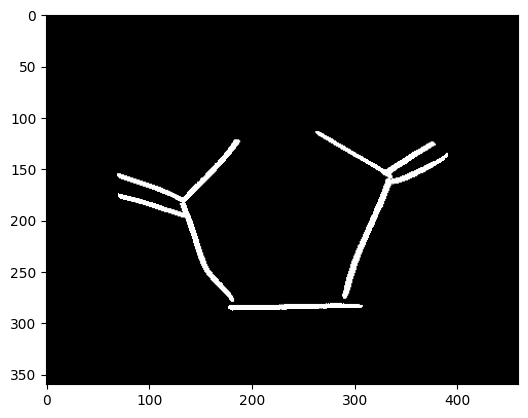

(1.0, 0.0, 0.0, 4.0)

In [6]:
detect_bonds(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct19\sd\struct19_01.png', r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles\struct19_01_tol_eq_0.77_template_bb.pickle', r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\pickles\struct19_01_corners.pickle')

In [7]:
#Main Body - Bond Classification
from collections import defaultdict, Counter
import cv2
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import os
from PIL import Image
import pickle
import random
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import subprocess
import time

def preprocess_training(image_dict, size=(40, 100), norm_width=40):
    processed = defaultdict(list)
    widths = defaultdict(list)
    avg_widths = defaultdict(list)
    avg_width_list = []
    
    for bond_type, imgs in image_dict.items():
        for img in imgs:
            if not os.path.exists(img):
                print(f"File not found: {img}")
                continue
            im = cv2.imread(img, 0)
            if im is None:
                print(f"Failed to read image: {img}")
                continue
            widths[bond_type].append(im.shape[1])
    
    for key in widths:
        avg_width_list.append(np.mean(widths[key]))
        avg_widths[key] = np.mean(widths[key])
    
    max_width = max(avg_width_list)
    
    for bond_type in image_dict.keys():
        imgs = image_dict[bond_type]
        for img in imgs:
            im = cv2.imread(img, 0)
            ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
            border = max(int((max_width - im.shape[1]) / 2), 0)
            im = cv2.copyMakeBorder(im, 0, 0, border, border, cv2.BORDER_CONSTANT, value=0)
            im = cv2.resize(im, size)
            im = cv2.GaussianBlur(im, (5, 5), 5)
            # Uncomment the following lines to display the image
            # plt.imshow(im, cmap="Greys_r")
            # plt.show()
            center = im[20:80, :]
            processed[bond_type].append(center)
    
    return processed

def hog(img):
    img = cv2.resize(img, (128, 128))
    hog = cv2.HOGDescriptor()
    features = hog.compute(img).flatten()
    return features

def train_classifier(processed_dict, train_split=0.9, type='svm'):
    label_conversion = defaultdict(str)
    label = 0

    featureX_train = []
    labels_train = []

    featureX_test = []
    labels_test = []

    for bond_type, im_list in processed_dict.items():  
        label_conversion[label] = bond_type
        for im in im_list:
            if random.random() <= train_split:
                for i in range(0, 60, 10):
                    features = hog(im[i:i + 20, :])
                    featureX_train.append(features)
                    labels_train.append(label)
            else:
                for i in range(0, 60, 10):
                    features = hog(im[i:i + 20, :])
                    featureX_test.append(features)
                    labels_test.append(label)
        label += 1

    if type == 'svm':
        classifier = SVC(kernel='linear')
    if type == 'logistic_regression':  
        classifier = LogisticRegression()
    if type == 'decision_tree':  
        classifier = DecisionTreeClassifier()
    
    classifier.fit(featureX_train, labels_train)

    if train_split != 1:
        predicted = classifier.predict(featureX_test)
        hits_by_class = defaultdict(list)
        for i, label in enumerate(labels_test):
            if label == predicted[i]:
                hits_by_class[label].append(1)
            else:
                hits_by_class[label].append(0)
        for label, hits in hits_by_class.items():  # Changed iteritems to items for Python 3
            print(label_conversion[label], np.mean(hits))
        return classifier.score(featureX_test, labels_test)

    return classifier, label_conversion

def get_bonds(line_segments, im):
    subimgs = []
    shape = im.shape
    for line_segment in line_segments:
        pt1 = line_segment[0]
        pt2 = line_segment[1]
        pt1y = int(pt1[0])
        pt1x = int(pt1[1])
        pt2y = int(pt2[0])
        pt2x = int(pt2[1])
        pt1vec = np.array([[pt1[0],pt1[1],1]]).transpose()
        pt2vec = np.array([[pt2[0],pt2[1],1]]).transpose()
        midpoint = (np.mean([pt1x,pt2x]), np.mean([pt1y,pt2y]))
        
        display = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
        cv2.rectangle(display,(pt1y-3,pt1x-3),(pt1y+3,pt1x+3),color=[255,0,0],thickness=-1)
        cv2.rectangle(display,(pt2y-3,pt2x-3),(pt2y+3,pt2x+3),color=[255,0,0],thickness=-1)
        #plt.imshow(display)
        #plt.show()

        translation = np.array([
            [1,0,-midpoint[1]+shape[1]/2],
            [0,1,-midpoint[0]+shape[0]/2]])

        pt1_t = np.dot(translation, pt1vec)
        pt2_t = np.dot(translation, pt2vec)
        pt1y = int(pt1_t[0])
        pt1x = int(pt1_t[1])
        pt2y = int(pt2_t[0])
        pt2x = int(pt2_t[1])

        translated = cv2.warpAffine(im,translation,(shape[1], shape[0]))

        translated_display = cv2.cvtColor(translated, cv2.COLOR_GRAY2RGB)
        cv2.rectangle(translated_display,(pt1y-3,pt1x-3),(pt1y+3,pt1x+3),color=[255,0,0],thickness=-1)
        cv2.rectangle(translated_display,(pt2y-3,pt2x-3),(pt2y+3,pt2x+3),color=[255,0,0],thickness=-1)
        #plt.imshow(translated_display)
        #plt.show()
        try:
            slope = (pt1y-pt2y) / (pt1x-pt2x)
            angle = np.degrees(-np.arctan(slope))
        except ZeroDivisionError:
            angle = -90 
        
        dist = np.linalg.norm(pt2_t-pt1_t)
        rotated = ndimage.rotate(translated, angle, reshape=False)

        pt1y = max([int(shape[0]*0.5 - dist*0.5),0])
        pt2y = int(shape[0]*0.5 + dist*0.5)
        if pt2y < 0:
            pt2y = shape[1]
        pt1x = int(shape[1]*0.5 - 20)
        pt2x = int(shape[1]*0.5 + 20)

        #cv2.rectangle(rotated_display,(pt1x,pt1y),(pt2x,pt2y),color=[255,0,0],thickness=2)
        
        subimg = rotated[pt1y:pt2y, pt1x:pt2x]
        subimgs.append(subimg)
        #plt.imshow(subimg)
        #plt.show()
    return subimgs

def classify_bonds(edge_file, img, classifier, label_dict, template_dict_file, rect_w=6, empty_thresh=0.3):
    im = cv2.imread(img, 0)
    ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
    im = cv2.copyMakeBorder(im, BORDER, BORDER, BORDER, BORDER, cv2.BORDER_CONSTANT, 0)
    shape = im.shape
    with open(edge_file, 'rb') as handle:
        edges = pickle.load(handle, encoding='latin1')
    with open(template_dict_file, 'rb') as handle:
        template_dict = pickle.load(handle, encoding='latin1')
    #print(edges)
    subimgs = get_bonds(edges, im)
    assignments = []
    for i, subimg in enumerate(subimgs):
        subimg = cv2.GaussianBlur(subimg, (5, 5), 5)
        n_blocks = max(int(np.floor((subimg.shape[0] - 10) / 10)), 0)
        blocks = []
        if n_blocks == 0:
            assignments.append('none')
            continue
        else:
            for block_start in [i * 10 for i in range(n_blocks)]:
                block_end = block_start + 10
                blocks.append(hog(subimg[block_start:block_end, :]))
        guesses = classifier.predict(blocks)
        guess_count = Counter(guesses)
        label = (guess_count.most_common(1)[0])[0]
        #print(label)
        assignments.append(label_dict[label])
    color_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    for i, line_segment in enumerate(edges):
        # Ensure that the points are tuples of integers
        pt1 = (int(line_segment[0][0]), int(line_segment[0][1]))
        pt2 = (int(line_segment[1][0]), int(line_segment[1][1]))
        color = COLOR_DICT[assignments[i]]
        if color == 'none':
            continue
        cv2.line(color_im, pt1, pt2, color, thickness=5)
    for key in template_dict.keys():
        if len(template_dict[key]) != 0:
            color = COLOR_DICT_OCR[key]
            for box in template_dict[key]:
                cv2.rectangle(color_im, (box[0], box[2]), (box[1], box[3]), color=color, thickness=5)
    plt.imshow(color_im)
    plt.ion()
    plt.show()
    #c = input("Correct? (y/n) --> ")
    #n = input("Number of edges correct --> ")
   # if c == 'y':
        #corr = 1.0
   # else:
        #corr = 0.0
    return 0,0

In [8]:
### Classifier Testing for Accuracies of Different Bonds per Image ###

scores = []
processed_dict = preprocess_training(BOND_TRAINING_DICT)
for i in range(10):
    scores.append(train_classifier(processed_dict, type = 'svm'))
print(np.mean(scores))


single 0.9523809523809523
double 0.5833333333333334
dashed 0.9166666666666666
single 0.9666666666666667
double 1.0
dashed 0.9166666666666666
single 1.0
double 1.0
triple 1.0
single 1.0
double 1.0
triple 0.6666666666666666
wedge 0.8333333333333334
single 1.0
double 1.0
wedge 0.7222222222222222
single 1.0
double 1.0
dashed 1.0
wedge 1.0
single 1.0
double 1.0
triple 1.0
wedge 1.0
single 1.0
double 1.0
triple 1.0
dashed 1.0
single 1.0
triple 1.0
dashed 0.8333333333333334
wedge 1.0
single 1.0
double 0.7222222222222222
triple 1.0
dashed 1.0
wedge 1.0
0.9595884439634439


In [9]:
#Training Different Classifiers
processed_dict = preprocess_training(BOND_TRAINING_DICT)
classifier_svm, label_dict_svm = train_classifier(processed_dict, train_split=1)
classifier_decision, label_dict_decision = train_classifier(processed_dict, train_split=1)
classifier_logistic, label_dict_logistic = train_classifier(processed_dict, train_split=1)

Passes all test cases 

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

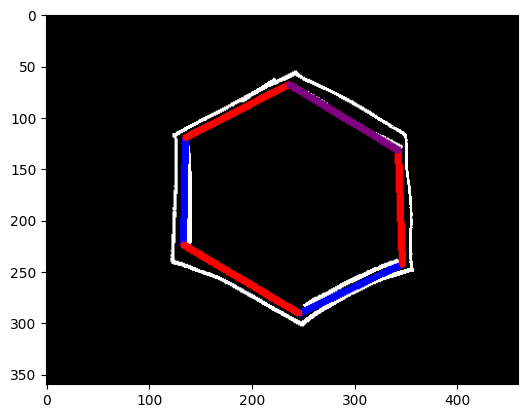

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

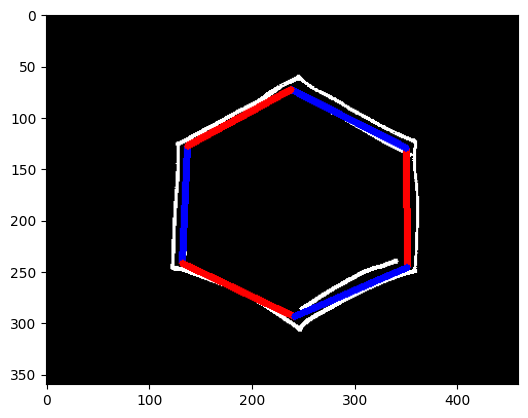

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

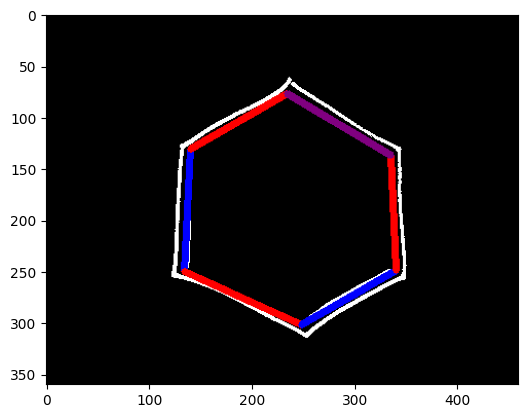

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

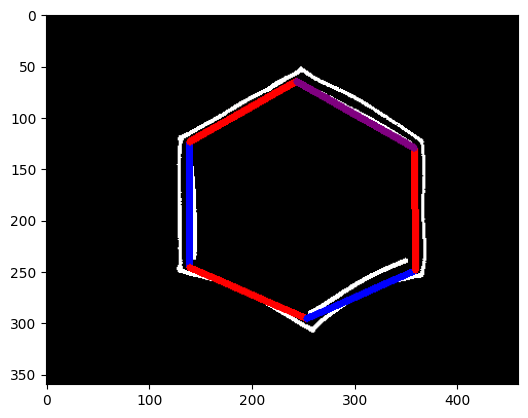

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

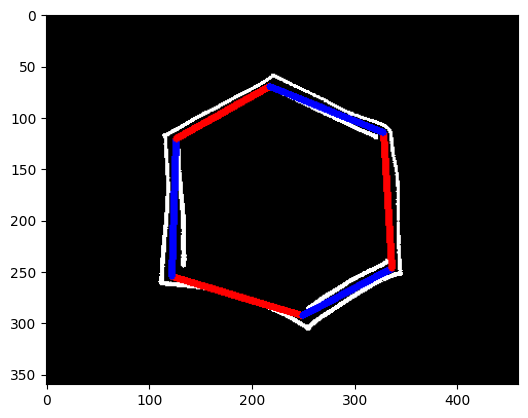

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

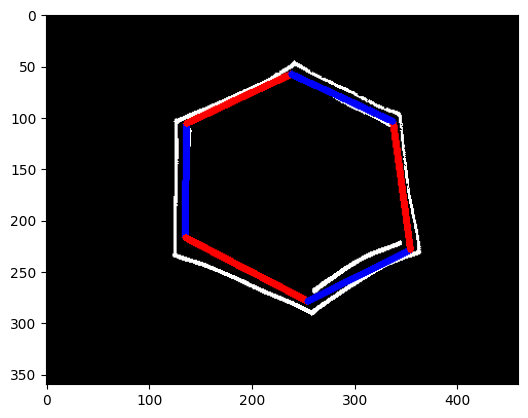

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

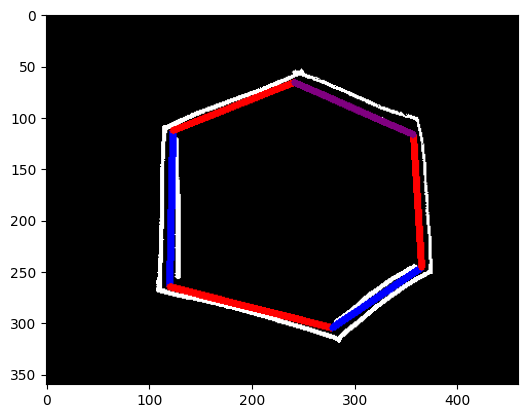

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

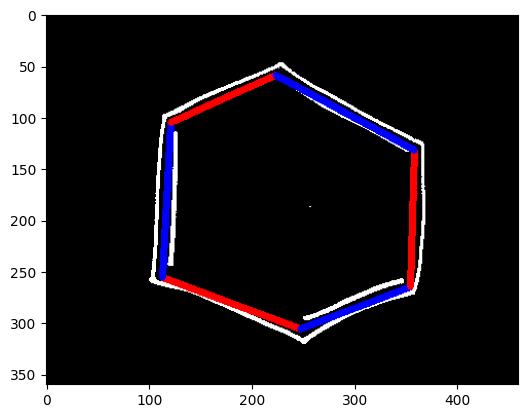

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

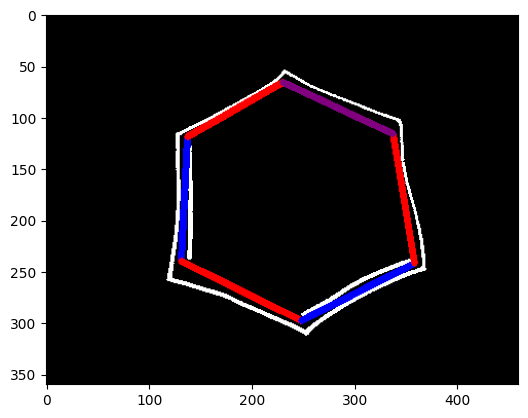

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

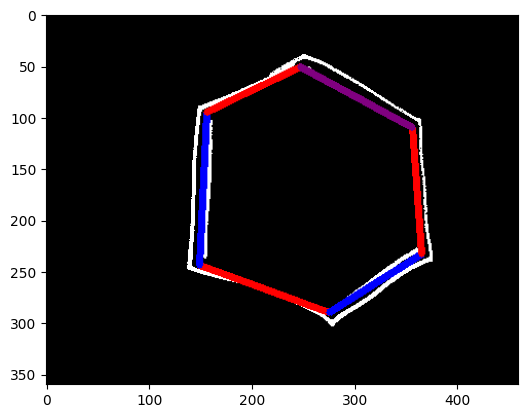

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

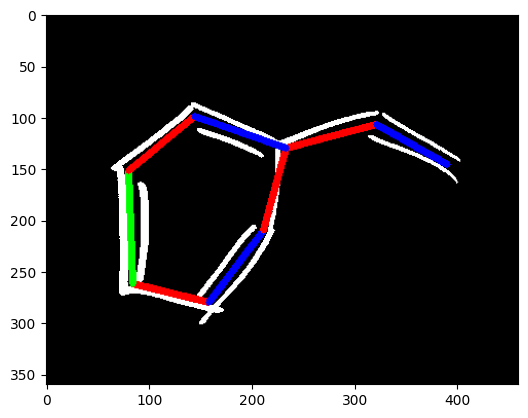

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

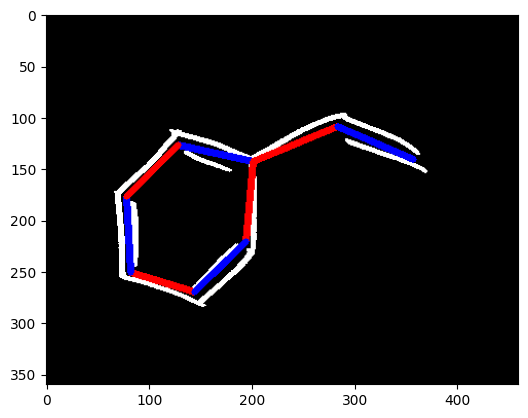

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

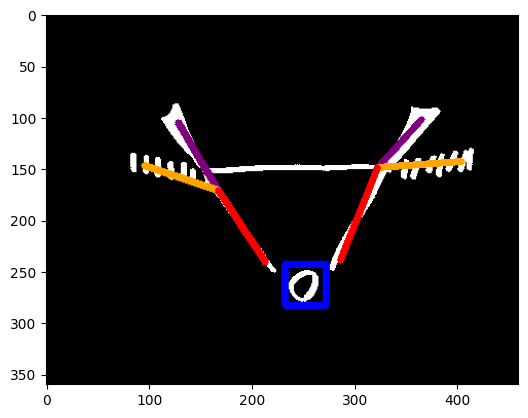

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

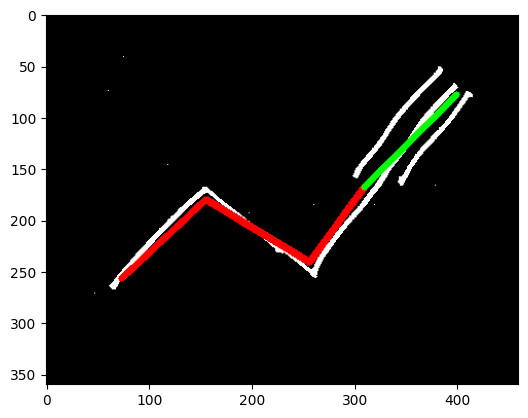

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

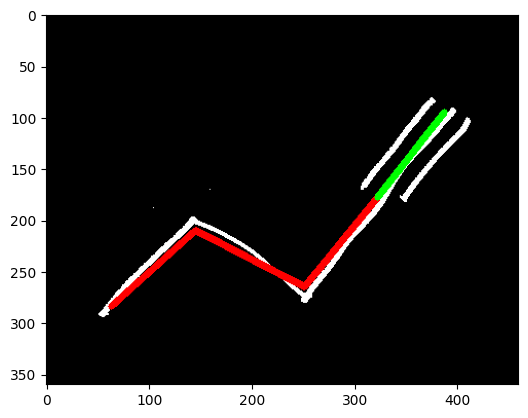

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

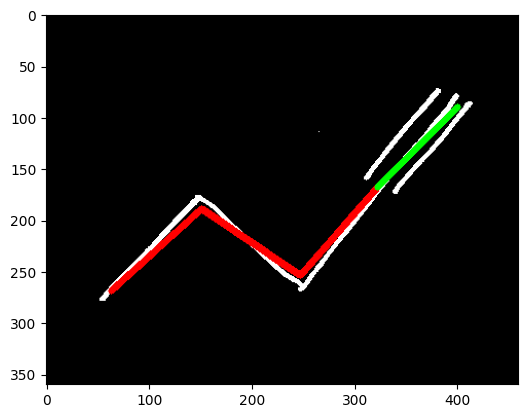

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

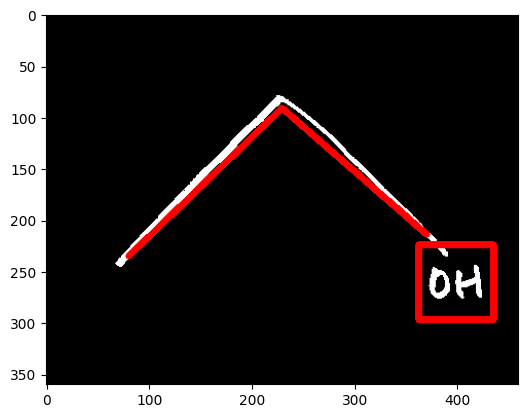

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

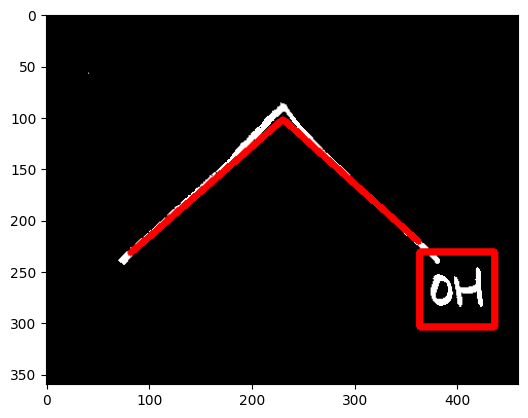

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

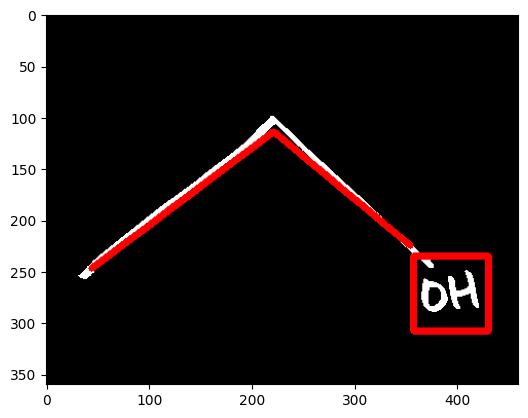

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

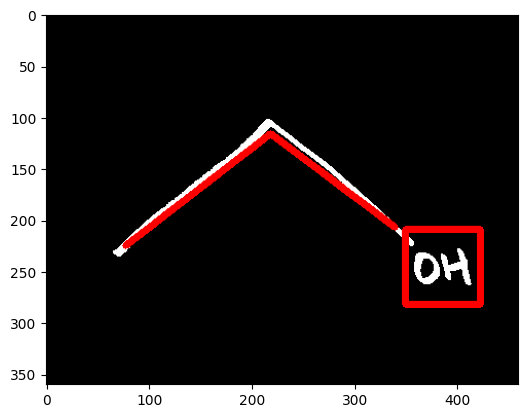

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

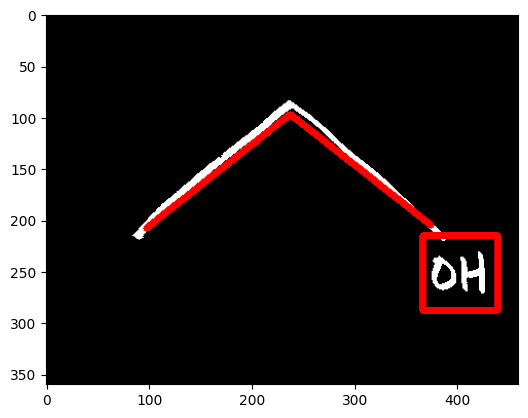

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

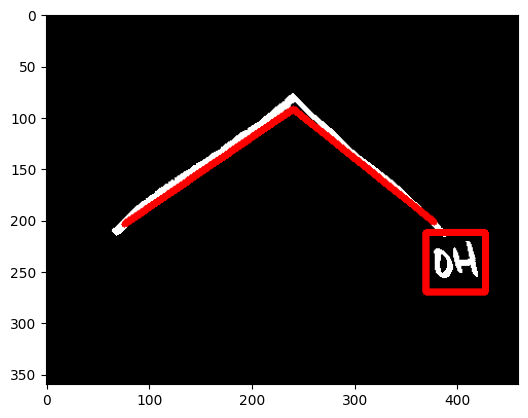

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

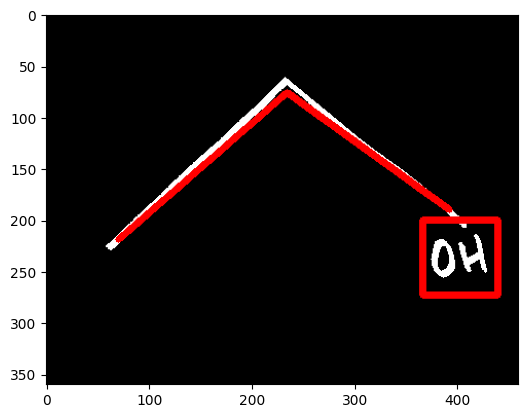

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

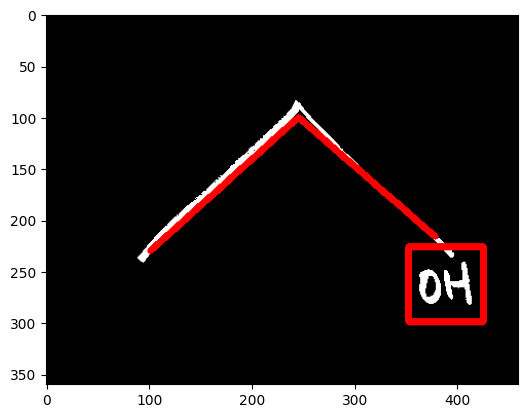

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

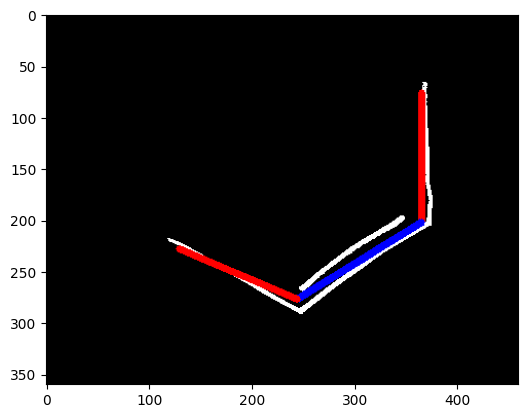

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

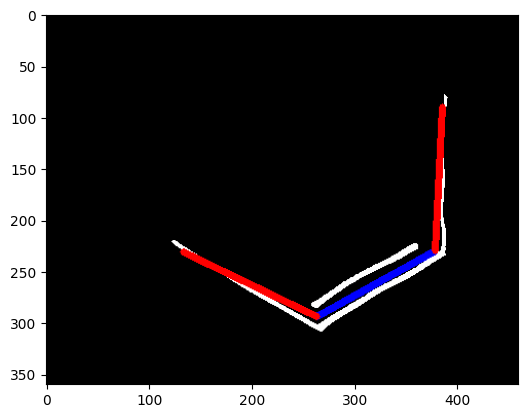

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

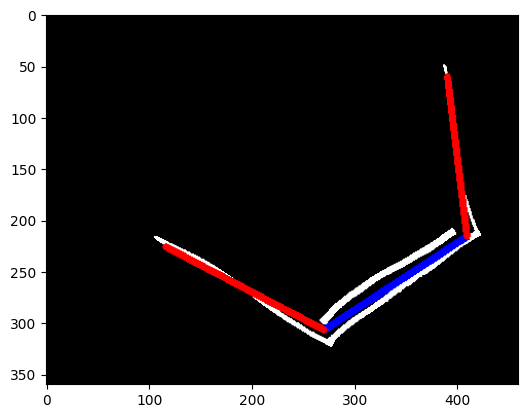

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

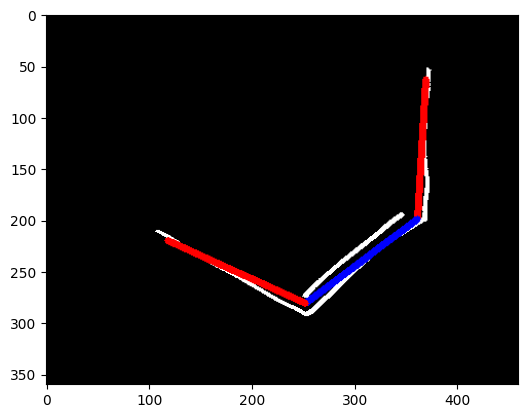

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

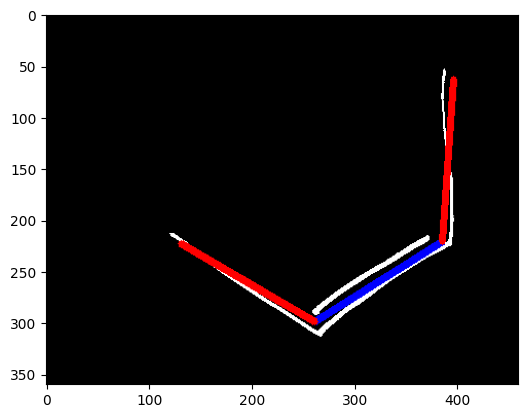

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

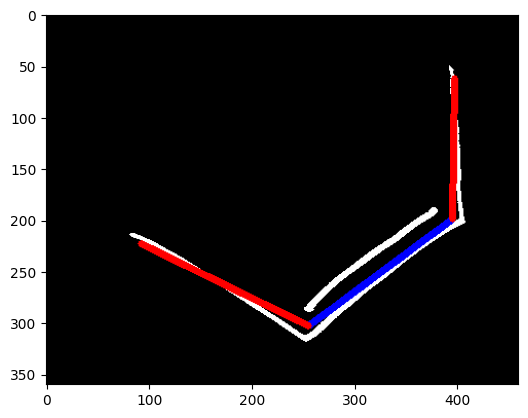

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

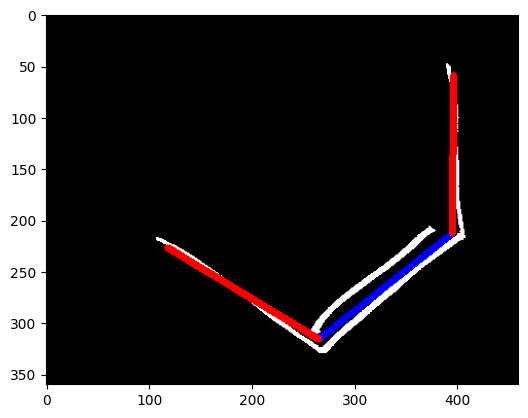

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

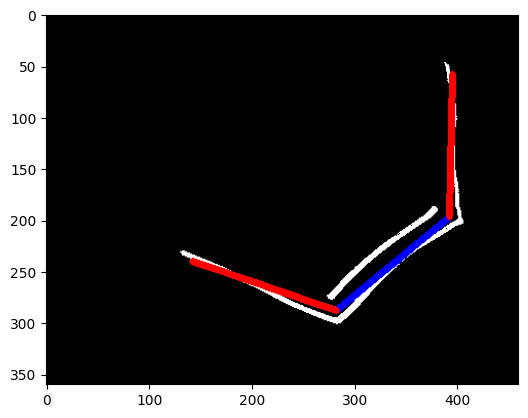

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

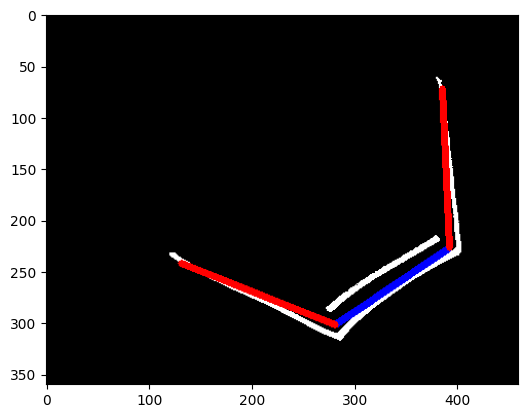

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

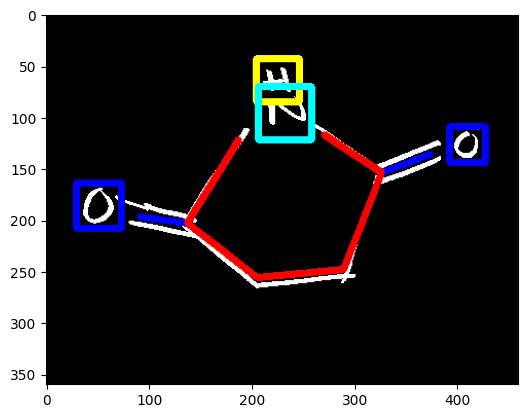

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

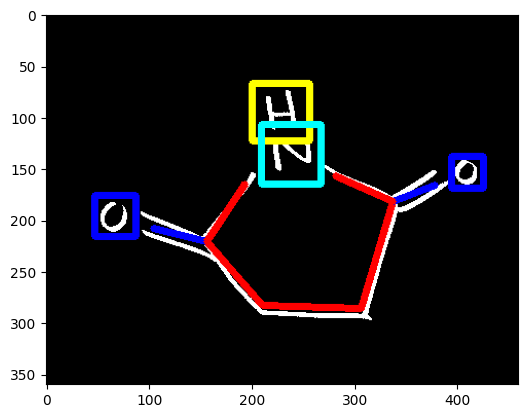

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

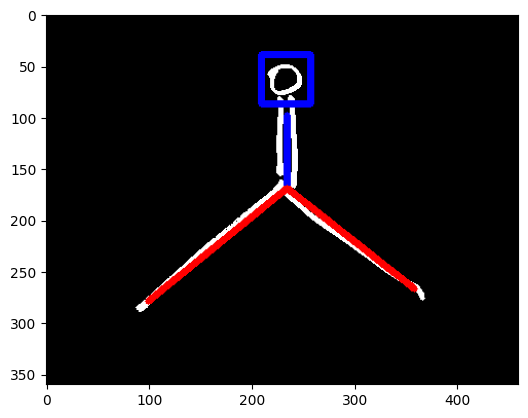

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

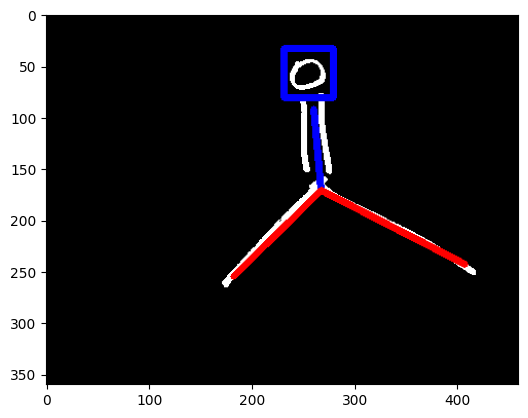

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

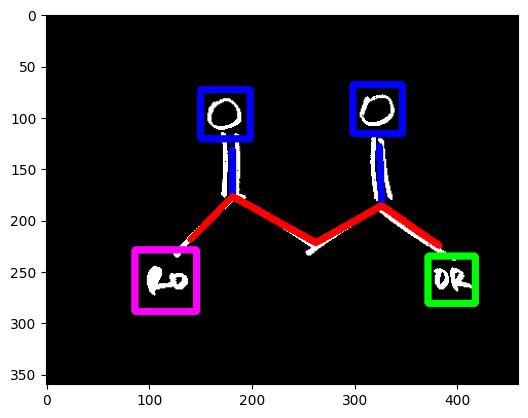

C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:138: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1y = int(pt1_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt1x = int(pt1_t[1])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pt2y = int(pt2_t[0])
C:\Users\rsurs\AppData\Local\Temp\ipykernel_22824\3562000658.

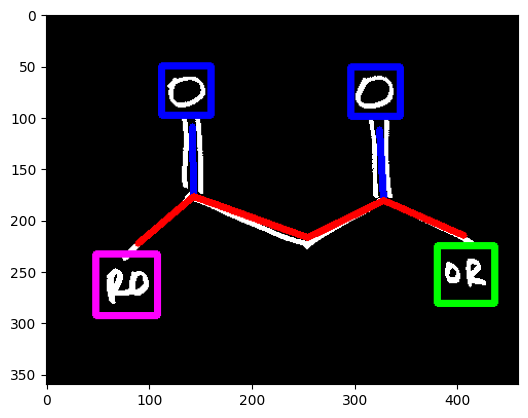

In [10]:
PATHS1 = [r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct1\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct4\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct5\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct8\sd"
         ]

PATHS2 = [r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct13\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct16\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct19\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct20\sd",
         r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Final_Project\data\struct22\sd"
        ]
for path in PATHS1:
    corr_mol = 0.0
    corr_edge = 0.0
    total = 0.0
    images = [img for img in os.listdir(path) if img.endswith('.png')]
    images = images[:10]

    for image in images:
        edge_file_pattern = image.split('.')[0] + '__edges.pickle'
        template_file_pattern = image.split('.')[0] + '_tol_eq_0.77_template_bb.pickle'

        edge_file_path = os.path.join('pickles', edge_file_pattern)
        template_file_path = os.path.join('pickles', template_file_pattern)

        if os.path.exists(edge_file_path) and os.path.exists(template_file_path):
            try:
                corr, n_corr = classify_bonds(
                    edge_file_path,
                    os.path.join(path, image),
                    classifier_svm,
                    label_dict_svm,
                    template_file_path
                )
                corr_mol += corr
                corr_edge += n_corr
                total += 1
            except IOError:
                pass  
            
for path in PATHS2:
    corr_mol = 0.0
    corr_edge = 0.0
    total = 0.0
    images = [img for img in os.listdir(path) if img.endswith('.png')]
    images = images[:10]

    for image in images:
        edge_file_pattern = image.split('.')[0] + '_edges.pickle'
        template_file_pattern = image.split('.')[0] + '_tol_eq_0.77_template_bb.pickle'

        edge_file_path = os.path.join('pickles', edge_file_pattern)
        template_file_path = os.path.join('pickles', template_file_pattern)

        if os.path.exists(edge_file_path) and os.path.exists(template_file_path):
            try:
                corr, n_corr = classify_bonds(
                    edge_file_path,
                    os.path.join(path, image),
                    classifier_svm,
                    label_dict_svm,
                    template_file_path
                )
                corr_mol += corr
                corr_edge += n_corr
                total += 1
            except IOError:
                print(f"Error processing file {image}: {e}")